# Multimodal Fusion Music Recommendation System

The purpose of this notebook is to perform the full data extraction, preprocessing, loading, and model pipeline.

In [1]:
%load_ext autoreload
%autoreload 2

## Data Extraction

In [ ]:
# Install the required packages
%pip install -r requirements.txt

In [95]:
# Download the dataset
!bash download_dataset.sh

Directory 'data' already exists.
Starting download from: http://www.ee.columbia.edu/~thierry/artist_term.db
--2024-11-20 18:22:56--  http://www.ee.columbia.edu/~thierry/artist_term.db
Resolving www.ee.columbia.edu (www.ee.columbia.edu)... 162.159.128.65, 162.159.138.64
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.128.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ee.columbia.edu/~thierry/artist_term.db [following]
--2024-11-20 18:22:56--  https://www.ee.columbia.edu/~thierry/artist_term.db
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.128.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138974208 (133M)
Saving to: ‘data/artist_term.db’

data/artist_term.db 100%[===================>] 132.54M  9.12MB/s    in 15s     

2024-11-20 18:23:12 (8.72 MB/s) - ‘data/artist_term.db’ saved [138974208/138974208]

Download completed successfully. Saved as 'data/artist_term.db'.
S

## Preprocessing

In [2]:
from preprocessing.util.processor import Processor

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Read data from databases/datasets, do some basic preprocessing, and save them as DataFrames serialized to pickle files.

In [17]:
processor = Processor(debug_messages=True)
processor.process()
processor.save_data()

Reading user listening history file: 48373586it [00:17, 2785160.16it/s]


Read 48373586 user triplets.
Reading mbtags from data/artist_term.db
Reading metadata from data/track_metadata.db
Database connected.
Columns in 'lyrics' table: ['track_id', 'mxm_tid', 'word', 'count', 'is_test', 'song_id']
'song_id' column already exists.
Lyrics table processed and pivoted with song_id as index.
Database connection closed.


## Loading

In [19]:
from models.data_provider import DataProvider

In [20]:
data_provider = DataProvider(
    label_embedding_technique='w2v',
    embedding_config={
        'vector_size': 100,
        'window': 5,
        'min_count': 5,
        'workers': 4,
        'sg': 1
    },
    save_embeddings_to_file=True,
    load_embeddings_from_file=True,
    clustering_method='kmeans',
    debug=True
)

In [21]:
data_provider.load_data()

Reading labels.
Reading tagged metadata.
Reading untagged metadata.
Reading lyrics.
Reading user data.


In [22]:
data_provider.generate_training_classes(cluster_config={'n_clusters': 10})

Generating training classes.
Reading label embedding dictionary from data/intermediate_output/label_embeddings/embedding_w2v.pkl.
Aggregating embeddings for all tracks.
Clustering mbtag_embedding.


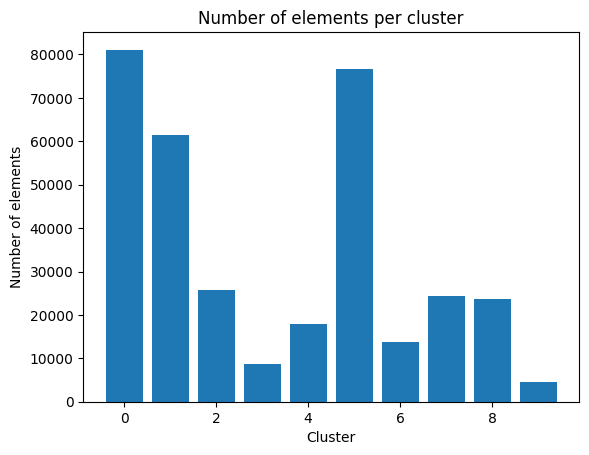

In [23]:
data_provider.plot_cluster_distribution()

In [ ]:
data_provider.untagged_metadata_df.merge(data_provider.lyrics_df, left_on='track_id', right_on='song_id')

,track_id,mbtag,mbtag_embedding,cluster,song_id,&,000,1,10,100,...,è,é,él,és,était,être,ô,über,–,‘caus
0,TRMMMUT128F42646E8,[folk],"[0.7562169, -0.5380547, 0.39446837, 0.96896756...",6,TRMMMUT128F42646E8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TRMMMQY128F92F0EA3,[brutal death metal],"[-0.40506032, 0.61479634, -0.23937295, -0.1311...",7,TRMMMQY128F92F0EA3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TRMMMTK128F424EF7C,[post-hardcore],"[-0.18116122, 0.4170791, 0.15471432, 0.0860755...",0,TRMMMTK128F424EF7C,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TRMMMNO128F93539AA,"[american, folk]","[0.23658922, -0.04320769, 0.3718499, 1.0878322...",0,TRMMMNO128F93539AA,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRMMMPJ128F9306985,[yolandita monge],"[-0.0002548337, 0.0029128205, -0.0057829535, 0...",5,TRMMMPJ128F9306985,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116474,TRYYKEF128F4278C8B,[french],"[0.37692413, 0.43074277, 0.55123943, 1.0862105...",1,TRYYKEF128F4278C8B,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116475,TRYYYDU12903CF47ED,"[black metal, portuguese, gothic metal, metal]","[-0.59522325, 0.68466645, -0.77810687, -0.5131...",7,TRYYYDU12903CF47ED,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116476,TRYYYEK128F933D353,[bunt sind schon die wälder],"[-0.009066036, 0.005090271, -0.004994242, 0.00...",5,TRYYYEK128F933D353,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
116477,TRYYYEE128F930BA5F,[rock and indie],"[-0.29034433, -0.7435871, 0.19210269, -0.65818...",4,TRYYYEE128F930BA5F,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model